# **CLUSTERING**

K-MEANS y Elbow Model

In [ ]:
!pip install matplotlib seaborn sklearn

In [45]:
#Importamos las librerías:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

Cargamos dataset y observamos las variables

In [46]:
df = pd.read_csv('/content/performance_clean.csv')

In [ ]:
df = df.drop(columns=['customerid'] + ['systemloanid'])
y = df['good_bad_flag']

In [48]:
df.head()

,loannumber,loanamount,termdays,good_bad_flag,interest,loan_interval,interest_interval
0,12,30000.0,30,Good,4500.0,10000,mas de 3000
1,2,15000.0,30,Good,2250.0,10000,menos de 3000
2,7,20000.0,Other,Good,2250.0,10000,menos de 3000
3,3,10000.0,Other,Good,1500.0,10000,menos de 3000
4,9,40000.0,30,Good,4000.0,10000,mas de 3000


In [ ]:
df.types

Vemos cuales son las variables categóricas

In [65]:
categorical_vars = set(df.columns[df.dtypes == object])
numerical_vars = set(df.columns) - categorical_vars
categorical_vars = list(categorical_vars)
numerical_vars = list(numerical_vars)

In [66]:
print(categorical_vars)
print(numerical_vars)

[]
['interest_interval_mas de 3000', 'good_bad_flag_Good', 'termdays_Other', 'loan_interval', 'interest', 'interest_interval_menos de 3000', 'Cluster', 'loanamount', 'loannumber']


**Dummies**

In [ ]:
#Generamos dummies de las variables categóricas:
dummy_int = pd.get_dummies(df[['interest_interval']], drop_first=True)
dummy_gf = pd.get_dummies(df[['good_bad_flag']], drop_first=True)
dummy_td = pd.get_dummies(df[['termdays']], drop_first=True)
#Añadimos las variables dummies y borramos las categóricas originales:
df = pd.concat([df, dummy_int, dummy_gf, dummy_td], axis=1)
df = df.drop(['interest_interval', 'good_bad_flag', 'termdays'], 1)


In [54]:
df

,loannumber,loanamount,interest,loan_interval,interest_interval_mas de 3000,interest_interval_menos de 3000,good_bad_flag_Good,termdays_Other
0,12,30000.0,4500.0,10000,1,0,1,0
1,2,15000.0,2250.0,10000,0,1,1,0
2,7,20000.0,2250.0,10000,0,1,1,1
3,3,10000.0,1500.0,10000,0,1,1,1
4,9,40000.0,4000.0,10000,1,0,1,0
...,...,...,...,...,...,...,...,...
4277,2,10000.0,3000.0,10000,0,0,0,0
4278,2,10000.0,3000.0,10000,0,0,0,0
4279,3,10000.0,1500.0,10000,0,1,0,1
4280,2,10000.0,3000.0,10000,0,0,0,0


Elbow Method para ver el número de clusters

In [56]:
distortions = []
K = range(1,10)
for k in K:
  kmeans_mod = KMeans(n_clusters = k)
  kmeans_mod.fit(df)
  distortions.append(kmeans_mod.inertia_)

Mostramos en pantalla y analizamos el **elbow plot**

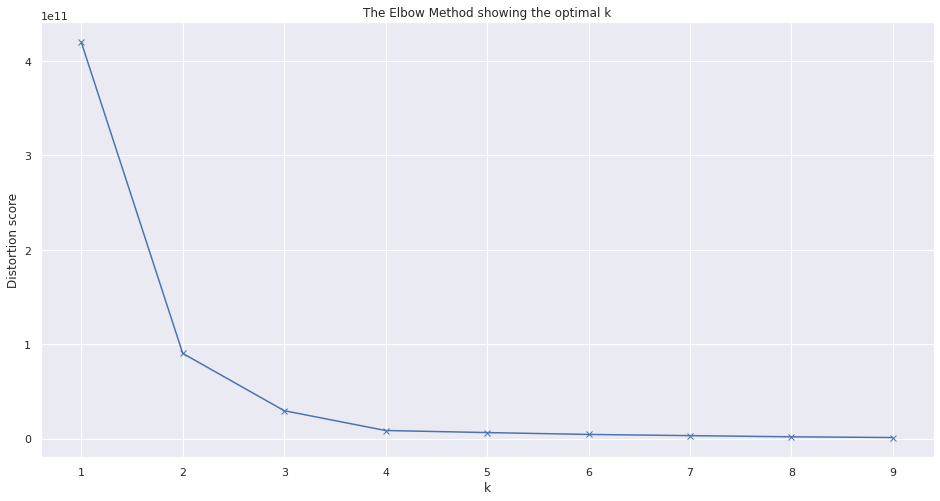

In [57]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion score')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**Método K-MEANS**

In [58]:
clustering =  KMeans(n_clusters = 2, max_iter = 300)
clustering.fit(df)

KMeans(n_clusters=2)

# **Shiloutte Score**

In [59]:
#Usamos el silhouette score
range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)

Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6, 7, 8, 9]


In [60]:
# Ajustamos el modelo para el rango de resultados y mostramos los resultados

for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters).fit(df)
    preds = clusterer.predict(df)
    centers = clusterer.cluster_centers_
    score = silhouette_score(df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.751862702235469)
For n_clusters = 3, silhouette score is 0.8202883455579854)
For n_clusters = 4, silhouette score is 0.8719540795682027)
For n_clusters = 5, silhouette score is 0.8881453562539579)
For n_clusters = 6, silhouette score is 0.8550230210108442)
For n_clusters = 7, silhouette score is 0.8663735954286768)
For n_clusters = 8, silhouette score is 0.9204405804571821)
For n_clusters = 9, silhouette score is 0.9350374711581356)


# **Agregamos al dataset original** 

In [61]:
df['Cluster'] = clustering.labels_
df.head()

,loannumber,loanamount,interest,loan_interval,interest_interval_mas de 3000,interest_interval_menos de 3000,good_bad_flag_Good,termdays_Other,Cluster
0,12,30000.0,4500.0,10000,1,0,1,0,0
1,2,15000.0,2250.0,10000,0,1,1,0,1
2,7,20000.0,2250.0,10000,0,1,1,1,1
3,3,10000.0,1500.0,10000,0,1,1,1,1
4,9,40000.0,4000.0,10000,1,0,1,0,0


In [62]:
df.to_csv('cluster_train.csv', sep=';', index=False)

# **Visualización clusters**

In [63]:
from sklearn.decomposition import PCA 

pca = PCA (n_components=2)
pca_df_cluster = pca.fit_transform(df)
pca_df_cluster_2 = pd.DataFrame(data=pca_df_cluster, columns = ['Componente1', 'Componente2'])
pca_columna = pd.concat([pca_df_cluster_2, df[['Cluster']]], axis=1)
pca_columna


,Componente1,Componente2,Cluster
0,12892.018515,465.140646,0
1,-2269.471587,903.073296,1
2,2694.564839,1501.701796,1
3,-7323.300374,1049.052596,1
4,22760.225020,2158.795631,0
...,...,...,...
4277,-7143.712555,-440.158514,1
4278,-7143.712555,-440.158514,1
4279,-7323.300379,1049.052573,1
4280,-7143.712555,-440.158514,1


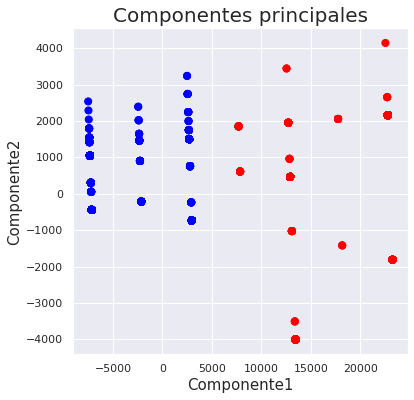

In [64]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente1', fontsize = 15)
ax.set_ylabel('Componente2', fontsize = 15)
ax.set_title('Componentes principales', fontsize = 20)

color_theme = np.array(["red", "blue", "black"])
ax.scatter(x = pca_columna.Componente1, y = pca_columna.Componente2,
          c=color_theme[pca_columna.Cluster], s = 50)
plt.show()

Agregamos los clusters al dataset test

In [ ]:
df = pd.read_csv("/content/performance_clean.csv",sep=';')
test, id_column = df.drop(['customerid'],axis=1), df['customerid']
res = clustering.predict(test)
test['customerid'], test['Cluster'] = id_column, res
test.head()

In [ ]:
test.to_csv("cluster_test.csv",sep=';',index=False)